In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.keras as keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers

import cv2
import os
from sklearn import preprocessing
from pathlib import Path

In [2]:
label_train = []
label_test = []

path_train = []
path_test = []



In [3]:
train_path = "./archive/train_zip/train/"
test_path = "./archive/test_zip/test/"

for filename in os.listdir(train_path):
    if(filename.split('.')[1] == "jpg"):
        label_train.append(filename.split('_')[0])
        path_train.append(os.path.join(train_path, filename))


for filename in os.listdir(test_path):
    if(filename.split(".")[1] == "jpg"):
        label_test.append(filename.split('_')[0])
        path_test.append(os.path.join(test_path, filename))



In [4]:
label_train_unique = np.unique(np.array(label_train))
label_test_unique = np.unique(np.array(label_test))

print("Unique label for the train :",label_train_unique)
print("Number of jpg Images in train are :", len(path_train))

print("Unique label for the test :", label_test_unique)
print("Number of jpg Images in test are :", len(path_test))


Unique label for the train : ['apple' 'banana' 'mixed' 'orange']
Number of jpg Images in train are : 240
Unique label for the test : ['apple' 'banana' 'mixed' 'orange']
Number of jpg Images in test are : 60


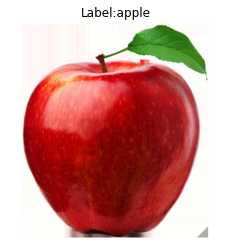

In [5]:
image = cv2.imread(path_train[0])

rbg_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rbg_img)
plt.title("Label:" + label_train[0])
plt.axis("off")
plt.show()

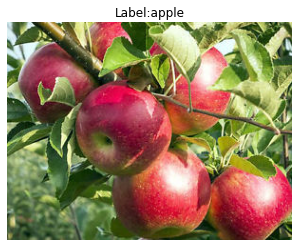

In [6]:
image = cv2.imread(path_test[0])

rbg_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(rbg_img)
plt.title("Label:" + label_test[0])
plt.axis("off")
plt.show()

In [7]:
x_train = []

for path in path_train:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rbg_img, (50,50))
    x_train.append(final_img)

x_train = np.array(x_train)



In [8]:
x_test = []

for path in path_test:
    img = cv2.imread(path)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    final_img = cv2.resize(rgb_img, (50,50))
    x_test.append(final_img)

x_test = np.array(x_test)

In [10]:
furits = {}

for i in range(len(label_train_unique)):
    furits[label_train_unique[i]] = i

furits

{'apple': 0, 'banana': 1, 'mixed': 2, 'orange': 3}

In [48]:
temp_train = []
temp_test = []

for label in label_train:
    temp_train.append(furits.get(label))

for label in label_test:
    temp_test.append(furits.get(label))

print("Length of the train data:",len(temp_train))
print("Length of the test data:",len(temp_test))+
temp_train

Length of the train data: 240
Length of the test data: 60


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

In [23]:
y_train = keras.utils.to_categorical(temp_train,4)
y_test = keras.utils.to_categorical(temp_test,4)

Length of x_train: 240
Checking x_train[1. 0. 0. 0.]


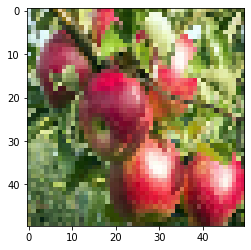

In [24]:
print("Length of x_train:", len(x_train))
plt.imshow(x_train[34])
print("Checking x_train" + str(y_train[34]))
plt.show()

Length of x_test: 60
Checking x_test[0. 1. 0. 0.]


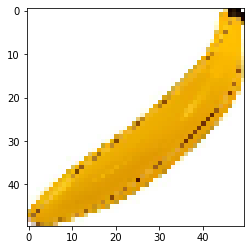

In [25]:
print("Length of x_test:", len(x_test))
plt.imshow(x_test[34])
print("Checking x_test" + str(y_test[34]))
plt.show()

In [28]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /=255
x_test /=255

In [29]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

print("\ny_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (240, 50, 50, 3)
x_test shape: (60, 50, 50, 3)

y_train shape: (240, 4)
y_test shape: (60, 4)


In [45]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(50, 50, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation="softmax"))


In [46]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 64)       

In [47]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    shuffle=True
)

s 353ms/step - loss: 1.2299 - accuracy: 0.3906 - val_loss: 2.1660 - val_accuracy: 0.0000e+00
Epoch 15/150
6/6 [==============================] - 2s 319ms/step - loss: 1.2516 - accuracy: 0.3385 - val_loss: 1.9079 - val_accuracy: 0.0000e+00
Epoch 16/150
6/6 [==============================] - 3s 460ms/step - loss: 1.2414 - accuracy: 0.3490 - val_loss: 2.0333 - val_accuracy: 0.0000e+00
Epoch 17/150
6/6 [==============================] - 3s 435ms/step - loss: 1.2401 - accuracy: 0.3854 - val_loss: 2.1853 - val_accuracy: 0.0000e+00
Epoch 18/150
6/6 [==============================] - 3s 505ms/step - loss: 1.2532 - accuracy: 0.3385 - val_loss: 1.8924 - val_accuracy: 0.0000e+00
Epoch 19/150
6/6 [==============================] - 2s 334ms/step - loss: 1.2406 - accuracy: 0.3750 - val_loss: 2.0521 - val_accuracy: 0.0000e+00
Epoch 20/150
6/6 [==============================] - 2s 370ms/step - loss: 1.2446 - accuracy: 0.3385 - val_loss: 2.0672 - val_accuracy: 0.0000e+00
Epoch 21/150
6/6 [=============

In [49]:
history.history["accuracy"]

[0.34375,
 0.3645833432674408,
 0.359375,
 0.4010416567325592,
 0.3854166567325592,
 0.4010416567325592,
 0.4114583432674408,
 0.421875,
 0.3854166567325592,
 0.390625,
 0.375,
 0.359375,
 0.3125,
 0.390625,
 0.3385416567325592,
 0.3489583432674408,
 0.3854166567325592,
 0.3385416567325592,
 0.375,
 0.3385416567325592,
 0.3802083432674408,
 0.3541666567325592,
 0.3958333432674408,
 0.3645833432674408,
 0.3697916567325592,
 0.3645833432674408,
 0.4010416567325592,
 0.3541666567325592,
 0.3854166567325592,
 0.375,
 0.3645833432674408,
 0.375,
 0.3958333432674408,
 0.3854166567325592,
 0.3854166567325592,
 0.390625,
 0.4270833432674408,
 0.3385416567325592,
 0.3385416567325592,
 0.3958333432674408,
 0.3645833432674408,
 0.4166666567325592,
 0.390625,
 0.4322916567325592,
 0.34375,
 0.3541666567325592,
 0.390625,
 0.3854166567325592,
 0.4479166567325592,
 0.4479166567325592,
 0.3802083432674408,
 0.3333333432674408,
 0.3802083432674408,
 0.3802083432674408,
 0.4114583432674408,
 0.40104165

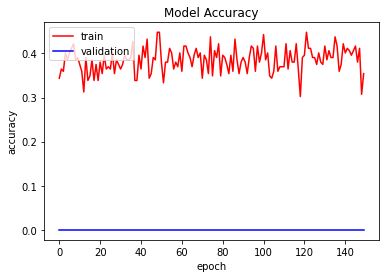

In [50]:
plt.plot(history.history["accuracy"], label="train", color="red")
plt.plot(history.history["val_accuracy"], label="validation", color="blue")
plt.title("Model Accuracy")
plt.legend(loc="upper left")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()